Tarea 5: Proyecto Análisis de Datos Dataset - Wilson Steven Cuesta 

Dataset Regresión Logística – Titanic:

1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.

In [330]:
#Cargar las librerias necesarias

import pandas as pd # Manejo y análisis de estructuras de datos
import numpy as np # Cálculo numérico y el análisis de datos
import seaborn as sns # Creación gráficos estadísticos
import matplotlib.pyplot as plt # Creación de gráficos en dos dimensiones
import plotly.graph_objs as go # Creación de gráficos en tres dimensiones
import plotly.express as px # Creación de gráficos en tres dimensiones

# librerías de para implementar modelo Kmeans
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

# librerías de para evaluar el modelo
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

#Librería para evitar la advertencia de que el modelo de KMeans tiene una pérdida de memoria en Windows 
import warnings
warnings.filterwarnings('ignore')

In [332]:
# lectura de datos en Python y lo cargamos en la variable Datos

Datos = pd.read_csv('Titanic-Dataset.csv')

In [334]:
# Realizamos lectura de los Datos para el análisis exploratorio

Datos.head(30)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [336]:
# Descripción de los datos
Datos.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos en Fare')

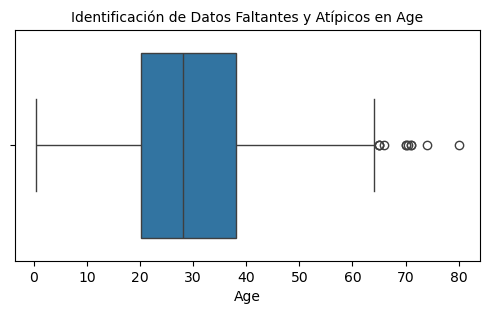

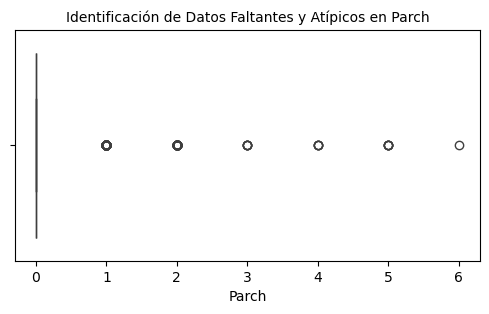

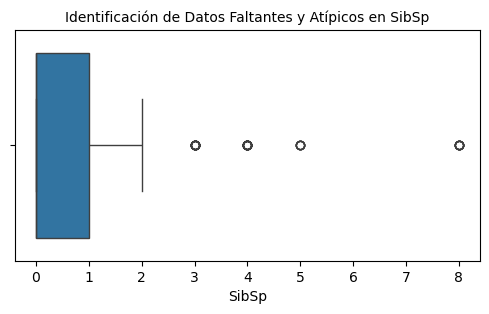

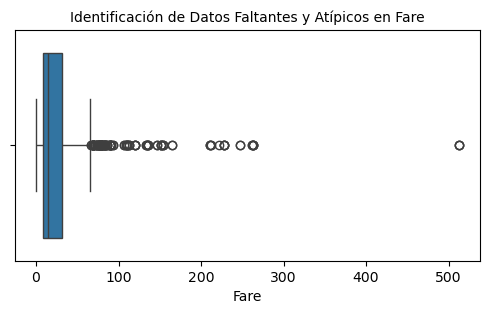

In [338]:
#Identificación de Datos Faltantes y Atípicos

# Creación del boxplot para la variable 'Age'
plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['Age'])
plt.title('Identificación de Datos Faltantes y Atípicos en Age', fontsize=10)

# Creación del boxplot para la variable 'Parch'
plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['Parch'])
plt.title('Identificación de Datos Faltantes y Atípicos en Parch', fontsize=10)

# Creación del boxplot para la variable 'SibSp'
plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['SibSp'])
plt.title('Identificación de Datos Faltantes y Atípicos en SibSp', fontsize=10)

# Creación del boxplot para la variable 'Fare'
plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['Fare'])
plt.title('Identificación de Datos Faltantes y Atípicos en Fare', fontsize=10)

Text(0.5, 1.0, 'Cantidad de sobrevivientes')

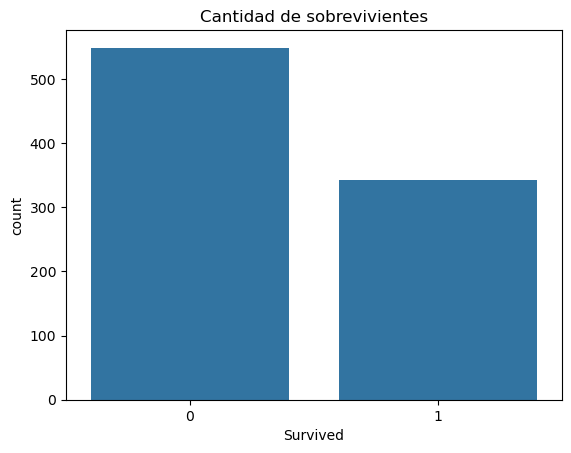

In [340]:
#Lista de sobrevivientes
data = Datos[['Survived']].astype(str)
sns.countplot(x='Survived', data=data.dropna()).set_title("Cantidad de sobrevivientes")

Text(0.5, 1.0, 'Sobreviventes por Género')

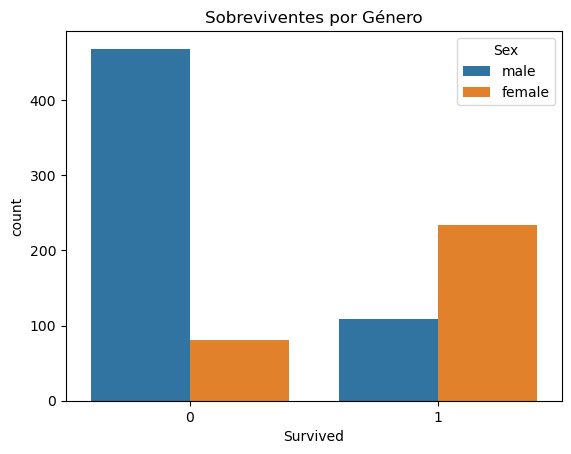

In [342]:
#Comparación de sobrevivientes por género
data = Datos[['Survived', 'Sex']].astype(str)
sns.countplot(x='Survived', hue='Sex', data=data.dropna()).set_title("Sobreviventes por Género")

Se observa que las mujeres sobrevivieron en mayor proporción que los hombres.

Text(0.5, 1.0, 'Sobrevivientes por Clase')

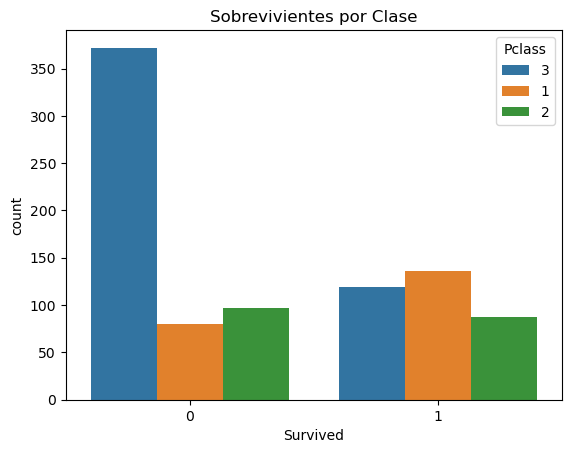

In [345]:
#Comparación de sobrevivientes por clase
data = Datos[['Survived', 'Pclass']].astype(str)
sns.countplot(x='Survived', hue='Pclass', data=data.dropna()).set_title("Sobrevivientes por Clase")

Se observa que de entre las 3 clases disponibles en el Titanic, la que más sobrevivientes tuvo fue la clase 1, mientras que la que más muertos presentó fue la clase 3.

Text(0.5, 1.0, 'Sobrevivientes por Embarcaciones')

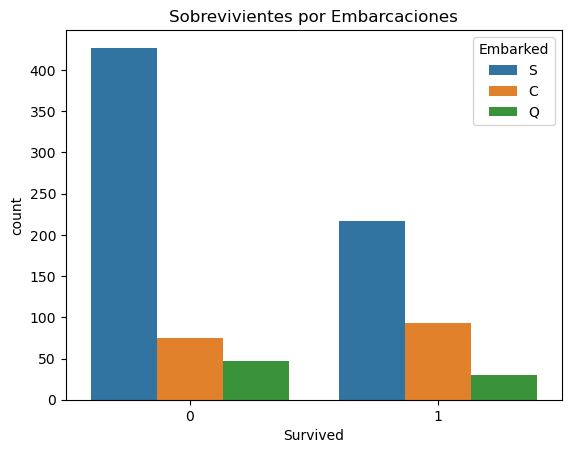

In [348]:
#Comparación de sobrevivientes por embarcaciones
data = Datos[['Survived', 'Embarked']].dropna().astype(str)
sns.countplot(x='Survived', hue='Embarked', data=data).set_title("Sobrevivientes por Embarcaciones")

Esta grafica denota que la embarcación con un mayor índice de supervivientes y no supervivientes fue la S, mientras que la Q fue la embarcación con un menor índice para ambos escenarios.

2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario

In [352]:
# Revisión de datos faltantes en cada columna
Datos.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [354]:
#Revision de datos faltantes

#Registros numéricos
print("Cantidad de registros nulos en PassengerId: ", Datos['PassengerId'].isna().sum())
print("Cantidad de registros nulos en Pclass: ", Datos['Pclass'].isna().sum())
print("Cantidad de registros nulos en Sex: ", Datos['Sex'].isna().sum())
print("Cantidad de registros nulos en Age: ", Datos['Age'].isna().sum())
print("Cantidad de registros nulos en SibSp: ", Datos['SibSp'].isna().sum())
print("Cantidad de registros nulos en Parch: ", Datos['Parch'].isna().sum())
print("Cantidad de registros nulos en Fare: ", Datos['Fare'].isna().sum())

#Registros textuales
print("Cantidad de registros nulos en Survived: ", Datos['Survived'].isna().sum())
print("Cantidad de registros nulos en Name: ", Datos['Name'].isna().sum())
print("Cantidad de registros nulos en Ticket: ", Datos['Ticket'].isna().sum())
print("Cantidad de registros nulos en Cabin: ", Datos['Cabin'].isna().sum())
print("Cantidad de registros nulos en Embarked: ", Datos['Embarked'].isna().sum())

Cantidad de registros nulos en PassengerId:  0
Cantidad de registros nulos en Pclass:  0
Cantidad de registros nulos en Sex:  0
Cantidad de registros nulos en Age:  177
Cantidad de registros nulos en SibSp:  0
Cantidad de registros nulos en Parch:  0
Cantidad de registros nulos en Fare:  0
Cantidad de registros nulos en Survived:  0
Cantidad de registros nulos en Name:  0
Cantidad de registros nulos en Ticket:  0
Cantidad de registros nulos en Cabin:  687
Cantidad de registros nulos en Embarked:  2


In [356]:
# Reemplazar los ceros o vacíos con el valor medio o la moda de la columna

#Edad
Datos['Age'] = Datos['Age'].mask(Datos['Age']=='nan', None).ffill()

#Cabina - Reemplazamos valor vacío con el valor de la casilla anterior y luego la posterior
Datos['Cabin'] = Datos['Cabin'].mask(Datos['Cabin']=='nan', None).ffill()
Datos['Cabin'] = Datos['Cabin'].mask(Datos['Cabin']=='nan', None).bfill()

#Embarcación - Reemplazamos valor vacío con el valor de la casilla anterior
Datos['Embarked'] = Datos['Embarked'].mask(Datos['Embarked']=='nan', None).ffill()

In [358]:
#Se vuelven a verificar los datos faltantes

#Registros numéricos
print("Cantidad de registros nulos en Edad: ", Datos['Age'].isna().sum())

#Registros textuales
print("Cantidad de registros nulos en cabina: ", Datos['Cabin'].isna().sum())
print("Cantidad de registros nulos en Embarcación: ", Datos['Embarked'].isna().sum())

Cantidad de registros nulos en Edad:  0
Cantidad de registros nulos en cabina:  0
Cantidad de registros nulos en Embarcación:  0


In [360]:
#Revisión de datos faltantes

print("Cantidad de Registros con cero en PassengerId: ",Datos['PassengerId'].isin([0]).sum())
print("Cantidad de Registros con cero en Survived: ",Datos['Survived'].isin([0]).sum())
print("Cantidad de Registros con cero en Pclass: ",Datos['Pclass'].isin([0]).sum())
print("Cantidad de Registros con cero en Name: ",Datos['Name'].isin([0]).sum())
print("Cantidad de Registros con cero en Sex: ",Datos['Sex'].isin([0]).sum())
print("Cantidad de Registros con cero en Age: ",Datos['Age'].isin([0]).sum())
print("Cantidad de Registros con cero en SibSp: ",Datos['SibSp'].isin([0]).sum())
print("Cantidad de Registros con cero en Parch: ",Datos['Parch'].isin([0]).sum())
print("Cantidad de Registros con cero en Ticket: ",Datos['Ticket'].isin([0]).sum())
print("Cantidad de Registros con cero en Fare: ",Datos['Fare'].isin([0]).sum())
print("Cantidad de Registros con cero en Cabin: ",Datos['Cabin'].isin([0]).sum())
print("Cantidad de Registros con cero en Embarked: ",Datos['Embarked'].isin([0]).sum())

Cantidad de Registros con cero en PassengerId:  0
Cantidad de Registros con cero en Survived:  549
Cantidad de Registros con cero en Pclass:  0
Cantidad de Registros con cero en Name:  0
Cantidad de Registros con cero en Sex:  0
Cantidad de Registros con cero en Age:  0
Cantidad de Registros con cero en SibSp:  608
Cantidad de Registros con cero en Parch:  678
Cantidad de Registros con cero en Ticket:  0
Cantidad de Registros con cero en Fare:  15
Cantidad de Registros con cero en Cabin:  0
Cantidad de Registros con cero en Embarked:  0


In [362]:
# Reemplazar los ceros con la media solo en variables donde un 0 puede representar un valor faltante.

Datos['Fare'] = Datos['Fare'].replace(0, Datos['Fare'].mean())

In [364]:
#Revisión nuevamente de datos faltantes

print("Cantidad de Registros con cero en Fare: ",Datos['Fare'].isin([0]).sum())

Cantidad de Registros con cero en Fare:  0


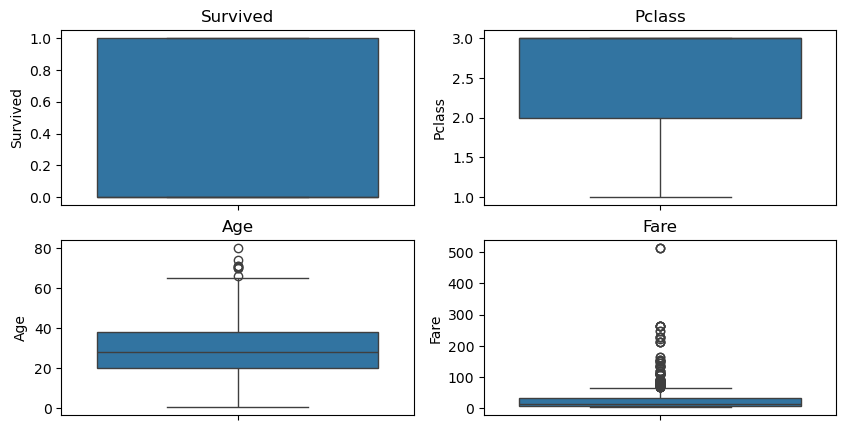

In [366]:
# Identificacion de valores faltantes y atipicos
fig, axs = plt.subplots(2,2, figsize = (10,5))
plt1 = sns.boxplot(Datos['Survived'], ax = axs[0,0]).set_title("Survived")
plt2 = sns.boxplot(Datos['Pclass'], ax = axs[0,1]).set_title("Pclass")
plt3 = sns.boxplot(Datos['Age'], ax = axs[1,0]).set_title("Age")
plt1 = sns.boxplot(Datos['Fare'], ax = axs[1,1]).set_title("Fare")

In [368]:
#Conteo de Datos Atípicos

# Survived
nivel_minimo = 0
nivel_maximo = 1
total_atipicos_fare = ((Datos['Survived'] < nivel_minimo) | (Datos['Survived'] > nivel_maximo)).sum()
print(f"El total de datos atípicos en 'Survived: {total_atipicos_fare}")

# Pclass
nivel_minimo = 1
nivel_maximo = 3
total_atipicos_fare = ((Datos['Pclass'] < nivel_minimo) | (Datos['Pclass'] > nivel_maximo)).sum()
print(f"El total de datos atípicos en Pclass: {total_atipicos_fare}")

# Age
nivel_minimo = 0
nivel_maximo = 80
total_atipicos_fare = ((Datos['Age'] < nivel_minimo) | (Datos['Age'] > nivel_maximo)).sum()
print(f"El total de datos atípicos en Age: {total_atipicos_fare}")

# Fare
nivel_minimo = 0
nivel_maximo = 300
total_atipicos_fare = ((Datos['Fare'] < nivel_minimo) | (Datos['Fare'] > nivel_maximo)).sum()
print(f"El total de datos atípicos en Fare: {total_atipicos_fare}")

El total de datos atípicos en 'Survived: 0
El total de datos atípicos en Pclass: 0
El total de datos atípicos en Age: 0
El total de datos atípicos en Fare: 3


In [370]:
# Filtrar los datos atípicos
Datos = Datos[(Datos['Fare'] >= nivel_minimo) & (Datos['Fare'] <= nivel_maximo)]

In [372]:
# Validar si se removieron los datos atípicos

total_atipicos_fare = ((Datos['Fare'] < nivel_minimo) | (Datos['Fare'] > nivel_maximo)).sum()
print(f"El total de datos atípicos en 'Fare' es: {total_atipicos_fare}")

El total de datos atípicos en 'Fare' es: 0


In [374]:
# Verificar
print(f"Forma del dataset después de filtrar 'Fare': {Datos.shape}")

Forma del dataset después de filtrar 'Fare': (888, 12)


In [376]:
#Revisión del tipo de datos y datos faltantes

Datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 888 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  888 non-null    int64  
 1   Survived     888 non-null    int64  
 2   Pclass       888 non-null    int64  
 3   Name         888 non-null    object 
 4   Sex          888 non-null    object 
 5   Age          888 non-null    float64
 6   SibSp        888 non-null    int64  
 7   Parch        888 non-null    int64  
 8   Ticket       888 non-null    object 
 9   Fare         888 non-null    float64
 10  Cabin        888 non-null    object 
 11  Embarked     888 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 90.2+ KB


Transformación de Datos

In [379]:
#Removemos columnas que no sean de utilidad
Datos.drop(['PassengerId', 'Ticket', 'Cabin', 'Name'], axis = 1, inplace = True)

In [381]:
#Transformamos Columnas que puedan clasificarse, en este caso, género y embarcación
Datos.replace({'Sex': {'female': 0, 'male': 1}}, inplace=True)
Datos['Sex'].value_counts()

Sex
1    575
0    313
Name: count, dtype: int64

In [383]:
Datos.replace({'Embarked': {'C': 0, 'S': 1, 'Q': 2}}, inplace=True)
Datos['Embarked'].value_counts()

Embarked
1    644
0    166
2     78
Name: count, dtype: int64

In [385]:
#revision del dataset
Datos.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,1
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,1
3,1,1,0,35.0,1,0,53.1000,1
4,0,3,1,35.0,0,0,8.0500,1


3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características

In [388]:
# Conteo total de personas que sobrevivieron y las que no

print("Total de personas sobrevivientes:")
print(Datos['Survived'].value_counts())

Total de personas sobrevivientes:
Survived
0    549
1    339
Name: count, dtype: int64


In [390]:
# Muestra los primeros 40 registros de la columna 'Survived'
Datos[['Survived']].head(20)

,Survived
0,0
1,1
2,1
3,1
4,0
5,0
6,0
7,0
8,1
9,1


4. Dividir el dataset en Train y Test para evaluar correctamente el modelo

In [393]:
# Porcentaje de datos para entrenamiento (train) = 75% , y para prueba (test) = 25%

# Se crean variables X y Y para almacenar la información del entrenamiento

X = Datos.drop('Survived',axis=1) # Se cargan los datos de train sin los datos de la columna Diabetico 
Y = Datos['Survived'] # Se cargan los datos de train con los datos de la la columna Diabetico

#La función train_test_split crea una división de un conjunto de datos en dos bloques uno de entrenamiento y otro de prueba (train and test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, stratify=Y, random_state= 0)

In [395]:
print (X_train)

     Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
671       1    1  31.0      1      0  52.0000         1
488       3    1  30.0      0      0   8.0500         1
634       3    0   9.0      3      2  27.9000         1
21        2    1  34.0      0      0  13.0000         1
418       2    1  30.0      0      0  13.0000         1
..      ...  ...   ...    ...    ...      ...       ...
131       3    1  20.0      0      0   7.0500         1
490       3    1   9.0      1      0  19.9667         1
528       3    1  39.0      0      0   7.9250         1
48        3    1  19.0      2      0  21.6792         0
80        3    1  22.0      0      0   9.0000         1

[666 rows x 7 columns]


In [397]:
print (Y_train)

671    0
488    0
634    0
21     1
418    0
      ..
131    0
490    0
528    0
48     0
80     0
Name: Survived, Length: 666, dtype: int64


5. Entrenar el modelo configurando los diferentes hiperparámetros

In [400]:
# Construir el modelo de regresión logística 

modelo_regresion = LogisticRegression(solver = "liblinear") # liblinear es una libreria para resolver problemas lineales de clasificación y regresión
modelo_regresion.fit (X_train , Y_train)   

# Crea el modelo de prediccion
Prediccion = modelo_regresion.predict(X_test) # la función predict predice los valores a partir del conjunto de datos de validación

In [402]:
print (Y_test)

654    0
319    1
182    0
684    0
600    1
      ..
882    0
434    0
304    0
500    0
633    0
Name: Survived, Length: 222, dtype: int64


In [404]:
print (Prediccion)

[1 1 0 0 1 1 1 1 0 1 0 1 0 0 1 1 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 1
 1 0 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1
 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 1 1 1 0 0 0
 0 0 1 0 0 0 0 1 1 1 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0
 1 1 0 0 1 0 1 0 1 1 1 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 1 1 1 0
 1 0 1 0 0 1 1 1 0 1 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0]


6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc

In [407]:
# Desempeño del modelo de regresión

print(classification_report(Y_test,Prediccion))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83       137
           1       0.75      0.66      0.70        85

    accuracy                           0.78       222
   macro avg       0.77      0.76      0.77       222
weighted avg       0.78      0.78      0.78       222



7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo

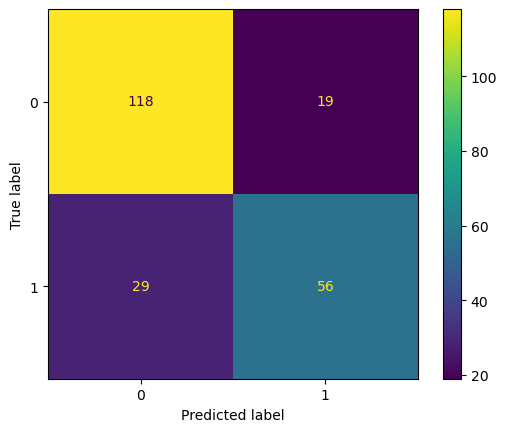

In [410]:
#Matrix de Confusión del modelo

cm=confusion_matrix(Y_test,Prediccion)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

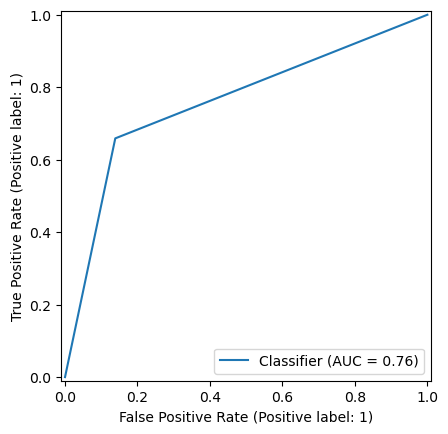

In [412]:
# Curva de precisón del modelo

from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(Y_test, Prediccion)
plt.show()

8. Interpretar, analizar y documentar los resultados obtenidos.

Del desempeño del modelo se puede describir:

 - Precisión: Precisión mide la proporción de predicciones positivas verdaderas entre todas las predicciones positivas realizadas por el modelo. Aquí la precisión para la clase "Survived" es 0.80 para 0 y de 0.75 para 1, lo que significa que el 80% de los predichos como no sobrevivientes y el 75% predichos como sobrevivientes fueron correctos.
 - Recall: Mide la proporción de predicciones positivas verdaderas entre todas las instancias positivas reales en el conjunto de datos. Aquí el Recall para la clase "Survived" es 0.86 para 0 y 0.66 para 1, lo que indica que el modelo predijo correctamente al 88% de los que no sobrevivieron y al 66% de los que sí.
- F1 Score: Es la media armónica de precisión y recuperación. Proporciona una puntuación única que equilibra la Precisión y Recall. Aquí la puntuación F1 para la clase "Survived" es 0.83 para 0 y 0.70 para 1, esto quiere decir que en efecto hay un equilibrio entre los métodos precisión y recall implementados en el modelo.

De la Matriz de Confusión podemos interpretar:

- Verdaderos negativos: el recuento de observaciones que un clasificador predijo correctamente como falso 118
- Verdaderos positivos: el recuento de observaciones que un clasificador predijo correctamente como Verdadero 56
- Falsos positivos: el recuento de observaciones que un clasificador predijo incorrectamente como Verdaderas 19
- Falsos negativos: el recuento de observaciones que un clasificador predijo incorrectamente como falso 29

De la curva de precisión del modelo se puede interpretar:

El AUC es 0.76 lo que significa que el 76 % de las predicciones del clasificador son correctas en todos los umbrales de clasificación.